<center>
    <img src="https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/Logos/organization_logo/organization_logo.png" width="300" alt="cognitiveclass.ai logo">
</center>


#### Import the required libraries we need for the lab.


In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as pyplot
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

#### Read the dataset in the csv file from the URL


In [3]:
boston_df=pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv')
boston_df


,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,9.67,22.4
502,502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,9.08,20.6
503,503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,5.64,23.9
504,504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,6.48,22.0


#### Add your code below following the instructions given in the course to complete the peer graded assignment


In [4]:
boston_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  506 non-null    int64  
 1   CRIM        506 non-null    float64
 2   ZN          506 non-null    float64
 3   INDUS       506 non-null    float64
 4   CHAS        506 non-null    float64
 5   NOX         506 non-null    float64
 6   RM          506 non-null    float64
 7   AGE         506 non-null    float64
 8   DIS         506 non-null    float64
 9   RAD         506 non-null    float64
 10  TAX         506 non-null    float64
 11  PTRATIO     506 non-null    float64
 12  LSTAT       506 non-null    float64
 13  MEDV        506 non-null    float64
dtypes: float64(13), int64(1)
memory usage: 55.5 KB


## Boxplot for "Median Value of Owner-Occupied Homes" (MEDV)

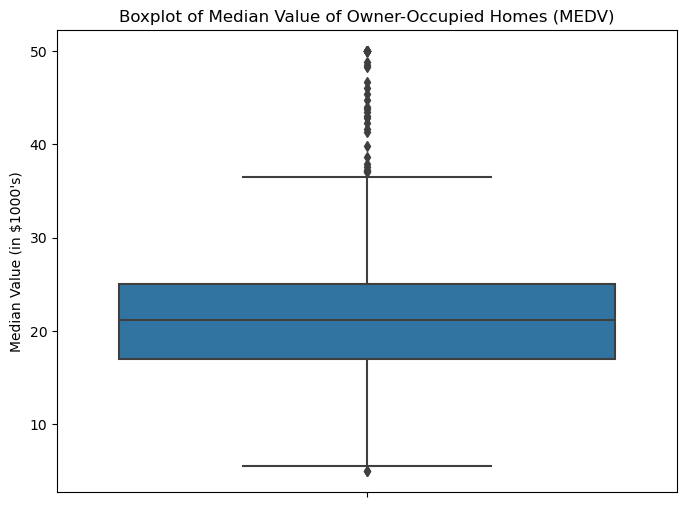

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

# Boxplot for MEDV
plt.figure(figsize=(8, 6))
sns.boxplot(y=boston_df['MEDV'])
plt.title('Boxplot of Median Value of Owner-Occupied Homes (MEDV)')
plt.ylabel('Median Value (in $1000\'s)')
plt.show()


The median value of homes seems to be around 22-24 (in $1000's).

## Bar Plot for Charles River Variable (CHAS)

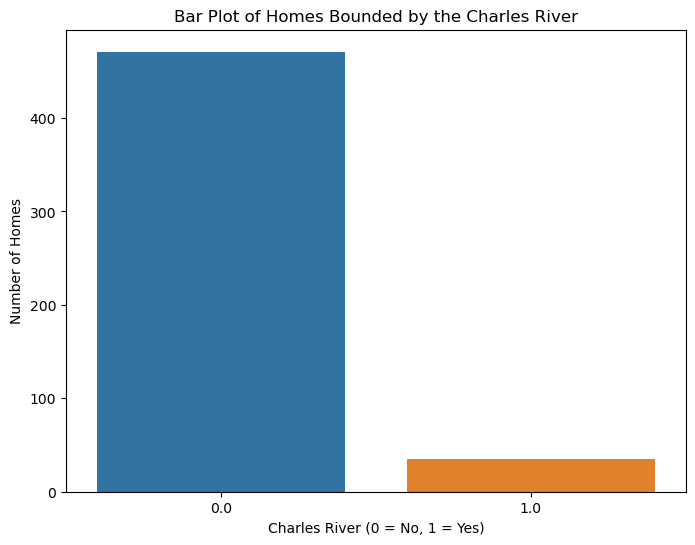

In [6]:
# Bar plot for CHAS
plt.figure(figsize=(8, 6))
sns.countplot(x=boston_df['CHAS'])
plt.title('Bar Plot of Homes Bounded by the Charles River')
plt.xlabel('Charles River (0 = No, 1 = Yes)')
plt.ylabel('Number of Homes')
plt.show()


 The vast majority of homes are not bounded by the Charles River, with only a small proportion (CHAS = 1) being located near it.

## Boxplot for MEDV vs AGE (Discretized Age Groups)

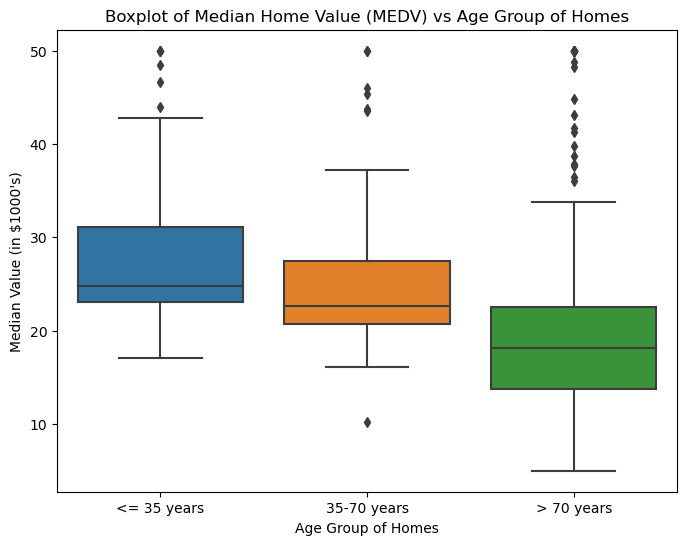

In [7]:
# Discretizing AGE
boston_df['AGE_Group'] = pd.cut(boston_df['AGE'], bins=[0, 35, 70, 100], labels=['<= 35 years', '35-70 years', '> 70 years'])

# Boxplot for MEDV vs AGE_Group
plt.figure(figsize=(8, 6))
sns.boxplot(x='AGE_Group', y='MEDV', data=boston_df)
plt.title('Boxplot of Median Home Value (MEDV) vs Age Group of Homes')
plt.xlabel('Age Group of Homes')
plt.ylabel('Median Value (in $1000\'s)')
plt.show()


## Scatter Plot for Nitric Oxide Concentrations (NOX) vs Non-Retail Business Acres (INDUS)

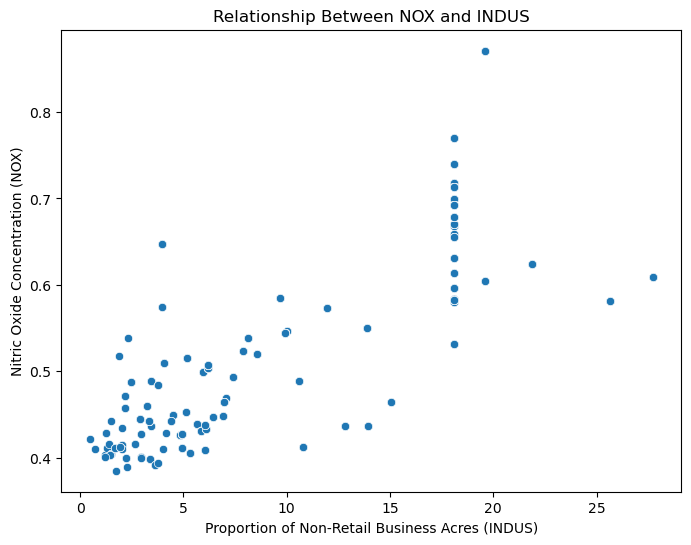

In [9]:
# Scatter plot for NOX vs INDUS
plt.figure(figsize=(8, 6))
sns.scatterplot(x='INDUS', y='NOX', data=boston_df)
plt.title('Relationship Between NOX and INDUS')
plt.xlabel('Proportion of Non-Retail Business Acres (INDUS)')
plt.ylabel('Nitric Oxide Concentration (NOX)')
plt.show()


 There appears to be a positive relationship between nitric oxide concentrations and the proportion of non-retail business acres. As INDUS increases (more industrial activity), the concentration of NOX also tends to rise, indicating that industrial areas may contribute to higher pollution levels.

## Histogram for Pupil-Teacher Ratio (PTRATIO)

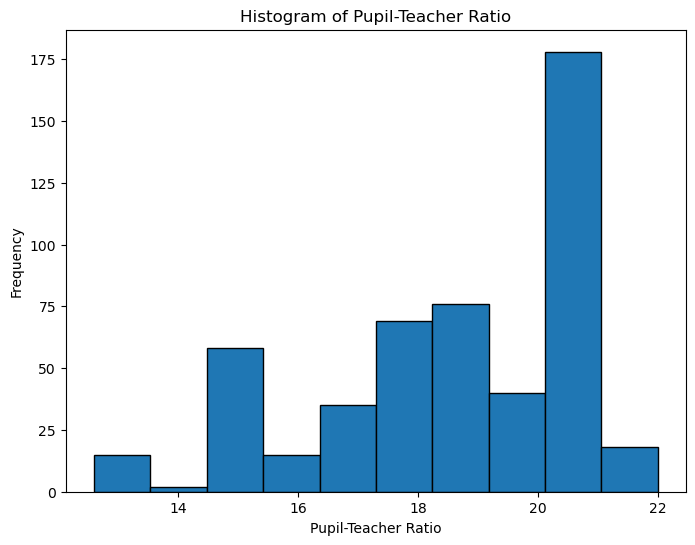

In [11]:
# Histogram for PTRATIO
plt.figure(figsize=(8, 6))
plt.hist(boston_df['PTRATIO'], bins=10, edgecolor='black')
plt.title('Histogram of Pupil-Teacher Ratio')
plt.xlabel('Pupil-Teacher Ratio')
plt.ylabel('Frequency')
plt.show()


The pupil-teacher ratio seems to be concentrated around 18 to 20, with most towns having a ratio in this range. This indicates a fairly consistent level of student-teacher engagement across the towns in the dataset.

## Is there a significant difference in the median value of houses bounded by the Charles River or not? (T-test for independent samples)

In [12]:
from scipy import stats

# Split data based on CHAS (1 if bounded by river, 0 otherwise)
chas_1 = boston_df[boston_df['CHAS'] == 1]['MEDV']
chas_0 = boston_df[boston_df['CHAS'] == 0]['MEDV']

# Perform t-test for independent samples
t_stat, p_value = stats.ttest_ind(chas_1, chas_0, equal_var=False)

# Output the result
t_stat, p_value


(3.113291312794837, 0.003567170098137517)

## Is there a difference in Median values of houses (MEDV) for each proportion of owner-occupied units built prior to 1940 (AGE)? (ANOVA)

In [13]:
# Perform ANOVA test
f_stat, p_value = stats.f_oneway(
    boston_df[boston_df['AGE_Group'] == '<= 35 years']['MEDV'],
    boston_df[boston_df['AGE_Group'] == '35-70 years']['MEDV'],
    boston_df[boston_df['AGE_Group'] == '> 70 years']['MEDV']
)

# Output the result
f_stat, p_value


(36.40764999196599, 1.7105011022702984e-15)

##  Can we conclude that there is no relationship between Nitric Oxide concentrations and the proportion of non-retail business acres per town? (Pearson Correlation)

In [14]:
# Perform Pearson correlation test
corr, p_value = stats.pearsonr(boston_df['NOX'], boston_df['INDUS'])

# Output the result
corr, p_value


(0.7636514469209149, 7.913361061242812e-98)

## What is the impact of an additional weighted distance to the five Boston employment centers on the median value of owner-occupied homes? (Regression Analysis)

In [15]:
import statsmodels.api as sm

# Independent variable (DIS) and dependent variable (MEDV)
X = boston_df['DIS']
y = boston_df['MEDV']

# Add a constant to the independent variable (for intercept in regression)
X = sm.add_constant(X)

# Perform the regression analysis
model = sm.OLS(y, X).fit()

# Output the result
model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Mon, 21 Oct 2024   Prob (F-statistic):           1.21e-08
Time:                        21:14:57   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Is there a difference in Median values of houses (MEDV) for each proportion of owner-occupied units built prior to 1940 (AGE)? (ANOVA)

In [16]:
# Perform ANOVA test
f_stat, p_value = stats.f_oneway(
    boston_df[boston_df['AGE_Group'] == '<= 35 years']['MEDV'],
    boston_df[boston_df['AGE_Group'] == '35-70 years']['MEDV'],
    boston_df[boston_df['AGE_Group'] == '> 70 years']['MEDV']
)

# Output the result
f_stat, p_value


(36.40764999196599, 1.7105011022702984e-15)

## Can we conclude that there is no relationship between Nitric Oxide concentrations and the proportion of non-retail business acres per town? (Pearson Correlation)

In [19]:
# Perform Pearson correlation test
corr, p_value = stats.pearsonr(boston_df['NOX'], boston_df['INDUS'])

# Output the result
corr, p_value


(0.7636514469209149, 7.913361061242812e-98)

##  What is the impact of an additional weighted distance to the five Boston employment centers on the median value of owner-occupied homes? (Regression Analysis)

In [20]:
import statsmodels.api as sm

# Independent variable (DIS) and dependent variable (MEDV)
X = boston_df['DIS']
y = boston_df['MEDV']

# Add a constant to the independent variable (for intercept in regression)
X = sm.add_constant(X)

# Perform the regression analysis
model = sm.OLS(y, X).fit()

# Output the result
model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Mon, 21 Oct 2024   Prob (F-statistic):           1.21e-08
Time:                        21:32:55   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""